In [202]:
import os
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

tf.random.set_seed(42)

filename = 'D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/Data/210913_70ms_3ea_Data.csv'
filename2 = 'D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/Data/210903_70ms_3ea_Data_merge.csv'
SD = pd.read_csv(filename)
prevSD = pd.read_csv(filename2)
SD=SD.iloc[:,:28]
prevSD=prevSD.iloc[:,:28]
SensorData = SD

In [203]:
SD.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z
count,388765.000000,388765.000000,388765.000000,388765.000000,388765.000000,388765.000000,388765.000000,388765.000000,388765.000000,388765.000000,...,388765.000000,388765.000000,388765.000000,388765.000000,388765.000000,388765.000000,388765.000000,388765.000000,388765.00000,388765.000000
mean,59.595498,46.284134,44.745990,48.601578,50.979686,47.348904,27.376780,49.612031,50.207248,48.436557,...,50.749083,56.561830,47.911385,46.863225,45.952957,51.316837,0.999984,174.999910,173.38132,80.001222
std,2.381293,2.508393,2.001531,1.777610,2.275610,2.887865,2.926286,2.115706,1.801579,1.717280,...,1.991482,11.949423,1.968264,2.116389,2.172797,2.223246,0.516384,103.883083,102.89524,36.056104
min,38.750000,35.290000,30.810000,33.710000,32.770000,25.350000,11.200000,31.160000,35.180000,33.390000,...,35.360000,33.600000,30.440000,28.890000,25.190000,32.930000,0.200000,0.000000,0.00000,20.000000
25%,58.470000,44.410000,43.270000,47.950000,49.690000,45.510000,25.450000,48.260000,48.830000,47.040000,...,49.920000,49.600000,46.780000,45.800000,44.380000,49.840000,0.600000,80.000000,81.21000,50.000000
50%,59.630000,45.930000,45.050000,48.840000,50.630000,47.430000,27.350000,50.060000,50.650000,48.860000,...,50.830000,51.600000,47.640000,46.690000,46.400000,51.620000,1.000000,180.000000,171.65000,80.000000
75%,60.790000,48.210000,45.940000,49.730000,52.510000,49.350000,29.250000,50.960000,51.560000,49.770000,...,51.740000,54.600000,49.360000,48.470000,47.410000,52.510000,1.400000,260.000000,262.31000,110.000000
max,68.910000,55.810000,52.170000,55.070000,60.030000,57.030000,41.600000,57.260000,58.840000,55.230000,...,59.930000,109.600000,54.520000,54.700000,53.470000,60.520000,1.800000,350.000000,359.96000,140.000000


In [204]:
SDext =SD # SensorData[SensorData['z']==0]
mask = SDext["z"].isin([150])
SDextz = SDext[~mask]
maskr  = SDextz["r"].isin([100])
SD = SDextz[~maskr]
SD.sample(10)

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z
39184,59.63,41.37,44.16,48.84,52.51,46.47,27.35,49.16,50.65,47.95,...,48.10,47.6,45.92,48.47,47.41,52.51,1.4,180,169.06,30
310772,59.63,48.21,46.83,46.17,48.75,51.27,29.25,49.16,49.74,50.68,...,50.83,47.6,49.36,47.58,48.42,51.62,1.0,350,341.06,115
237656,56.15,49.73,45.05,47.95,49.69,50.31,26.40,51.86,50.65,49.77,...,53.56,82.6,49.36,47.58,49.43,52.51,0.4,100,91.41,95
215209,61.95,42.89,43.27,49.73,50.63,46.47,26.40,50.06,51.56,47.95,...,50.83,49.6,48.50,45.80,45.39,51.62,0.6,300,282.66,85
321302,59.63,46.69,45.94,47.95,49.69,47.43,25.45,52.76,49.74,47.04,...,49.01,52.6,48.50,47.58,45.39,49.84,1.6,230,224.21,120
197072,61.95,46.69,42.38,49.73,47.81,45.51,25.45,50.96,48.83,47.95,...,51.74,51.6,46.78,45.80,47.41,48.95,0.6,240,232.91,80
306173,57.31,45.93,47.72,49.73,50.63,48.39,27.35,50.06,50.65,47.04,...,47.19,47.6,48.50,47.58,44.38,51.62,1.6,240,228.30,115
156778,58.47,46.69,45.05,48.84,53.45,46.47,31.15,46.46,51.56,48.86,...,51.74,51.6,47.64,49.36,46.40,40.94,1.8,20,19.03,70
216746,63.11,44.41,37.93,48.84,49.69,42.63,25.45,53.66,51.56,48.86,...,50.83,50.6,51.08,44.91,47.41,51.62,1.6,330,310.69,85
203866,63.11,46.69,50.39,49.73,48.75,45.51,29.25,50.96,48.83,47.95,...,52.65,48.6,48.50,47.58,47.41,48.06,1.8,30,22.50,85


In [169]:
import numpy as np
toRad = np.pi/180 
SD['cos']=np.cos(SD.theta_enc*toRad)
SD['sin']=np.sin(SD.theta_enc*toRad)
#SD['r'] = (SD['r']-1.4)/0.3
SD['z'] = (SD['z']-52.5)/32.5

In [170]:
SD

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z,cos,sin
0,63.11,47.45,45.94,47.06,54.39,51.27,28.30,50.06,50.65,47.04,...,45.92,43.13,45.39,50.73,0.2,0,0.04,-1.0,1.000000,0.000698
1,63.11,43.65,43.27,47.95,51.57,48.39,29.25,46.46,48.83,47.04,...,45.06,44.02,44.38,49.84,0.2,0,0.04,-1.0,1.000000,0.000698
2,64.27,44.41,44.16,46.17,53.45,47.43,27.35,47.36,48.83,44.31,...,45.92,45.80,45.39,51.62,0.2,0,0.04,-1.0,1.000000,0.000698
3,64.27,45.17,42.38,47.95,50.63,46.47,27.35,46.46,47.01,45.22,...,47.64,44.91,46.40,53.40,0.2,0,0.04,-1.0,1.000000,0.000698
4,63.11,45.17,44.16,46.17,52.51,48.39,29.25,46.46,48.83,47.95,...,45.92,44.91,43.37,51.62,0.2,0,0.04,-1.0,1.000000,0.000698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217695,64.27,47.45,38.82,46.17,50.63,37.83,24.50,49.16,50.65,47.95,...,49.36,45.80,46.40,53.40,1.8,350,326.82,1.0,0.836955,-0.547271
217696,63.11,45.93,39.71,44.39,50.63,41.67,25.45,50.96,47.01,44.31,...,47.64,46.69,46.40,50.73,1.8,350,326.82,1.0,0.836955,-0.547271
217697,63.11,46.69,38.82,43.50,51.57,42.63,25.45,50.06,48.83,47.04,...,45.06,46.69,46.40,53.40,1.8,350,326.82,1.0,0.836955,-0.547271
217698,61.95,46.69,37.93,46.17,49.69,42.63,25.45,50.96,54.29,47.95,...,48.50,46.69,46.40,52.51,1.8,350,326.82,1.0,0.836955,-0.547271


<AxesSubplot:>

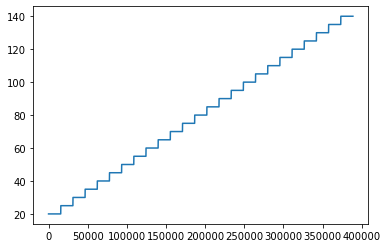

In [205]:
SDz=(SD.loc[:,'z'])
SDz.plot()

In [172]:
SDy = SD.iloc[:,24:30]
SDy.describe()

,r,theta,theta_enc,z,cos,sin
count,217700.000000,217700.00000,217700.00000,217700.000000,217700.000000,217700.000000
mean,0.999987,175.00147,172.36954,-0.000014,0.000240,0.023521
std,0.516383,103.88454,102.79514,0.620191,0.697160,0.716533
min,0.200000,0.00000,0.00000,-1.000000,-1.000000,-0.999971
25%,0.600000,80.00000,77.87000,-0.538462,-0.691765,-0.702774
50%,1.000000,180.00000,170.55000,0.076923,0.036120,0.094977
75%,1.400000,270.00000,262.44000,0.538462,0.683432,0.728491
max,1.800000,350.00000,359.96000,1.000000,1.000000,1.000000


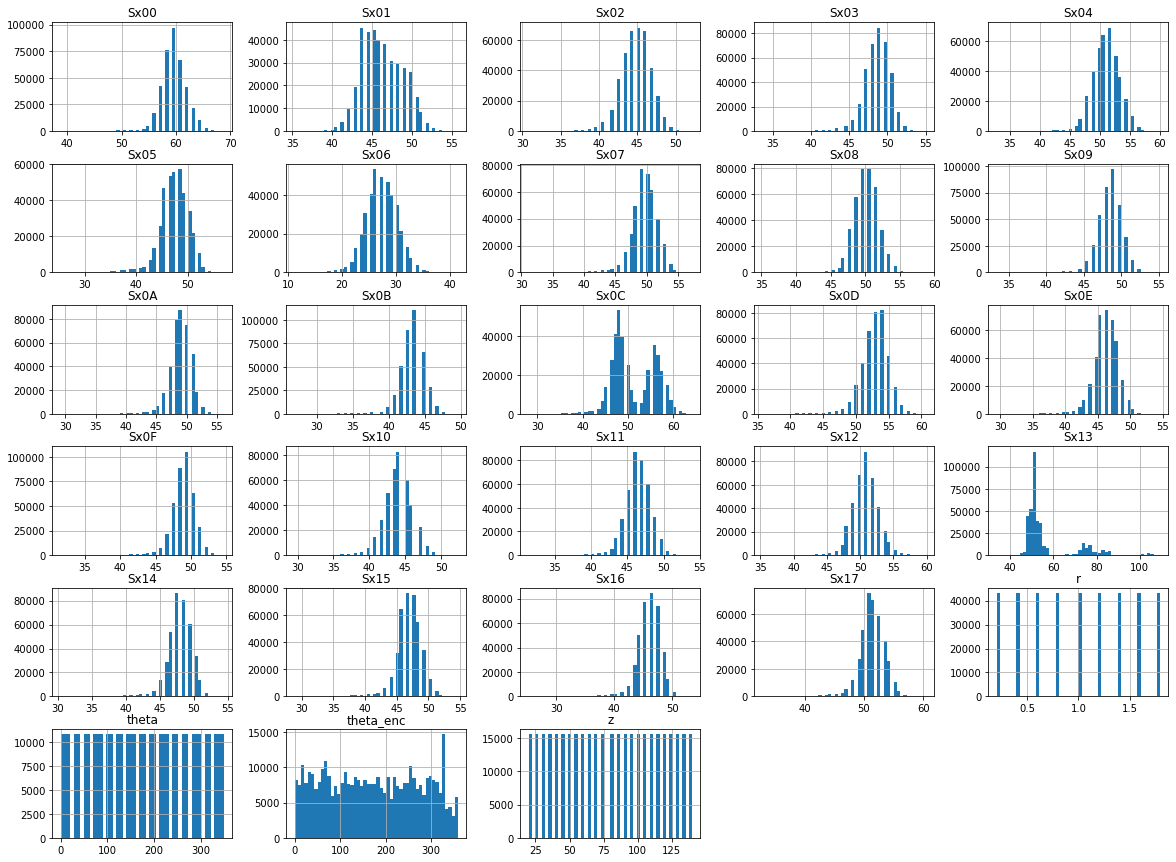

In [206]:
%matplotlib inline
import matplotlib.pyplot as plt
SD.hist(bins=50, figsize=(20,15))
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/savefig/210913_70ms_3ea.png')
plt.show()

C:\Users\JaeHyeong_Lab\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


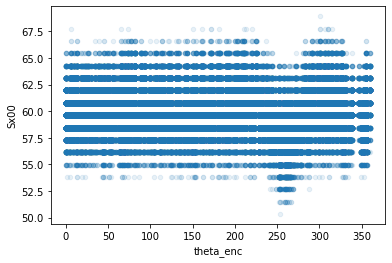

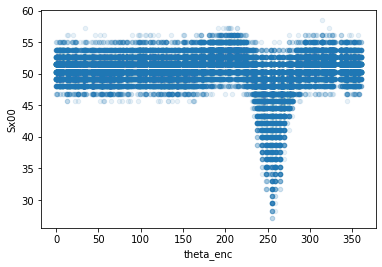

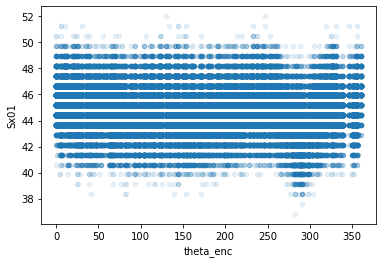

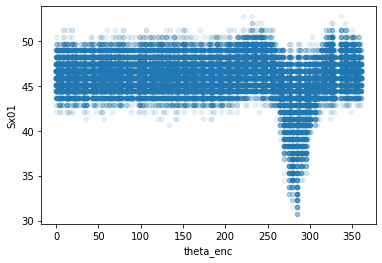

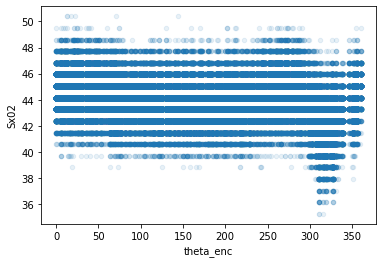

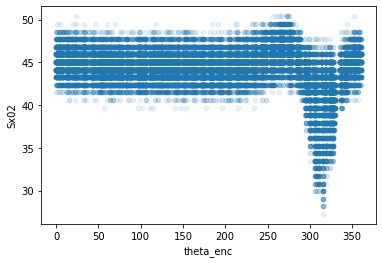

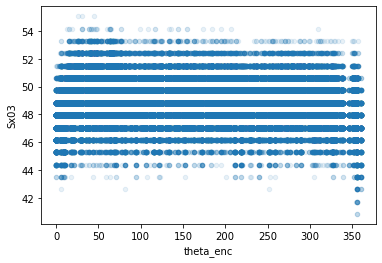

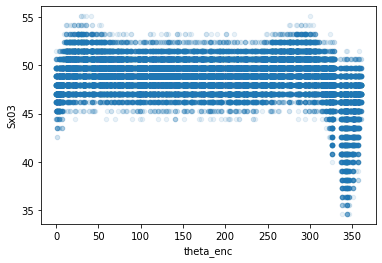

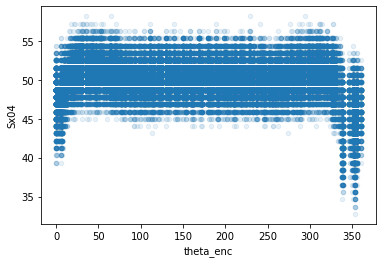

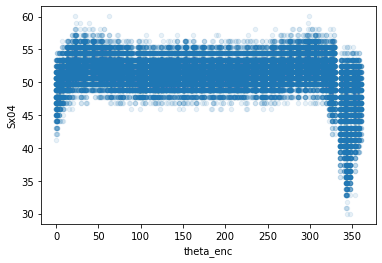

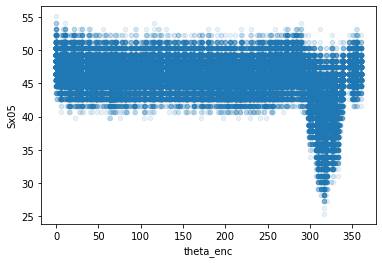

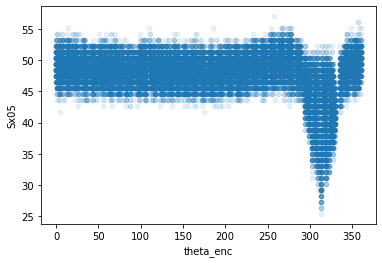

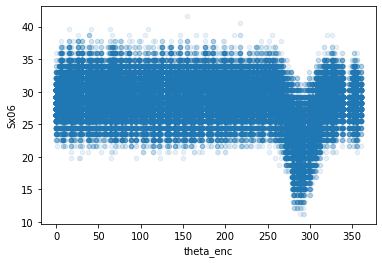

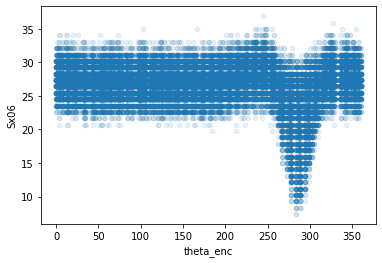

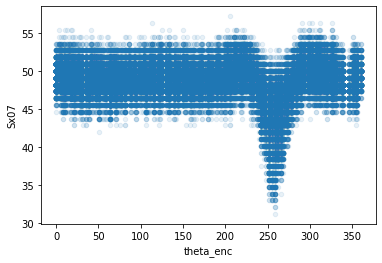

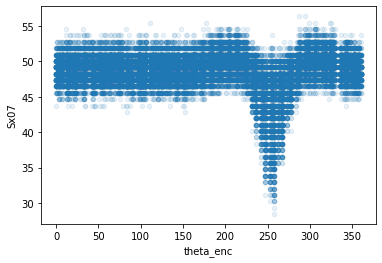

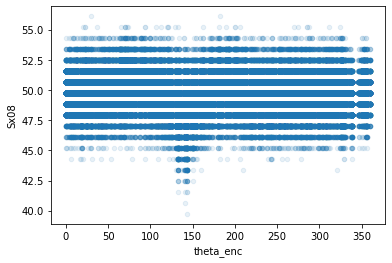

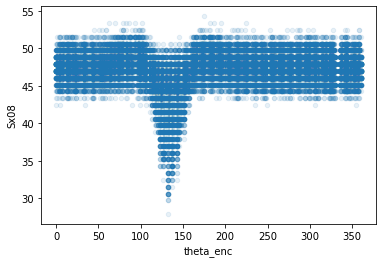

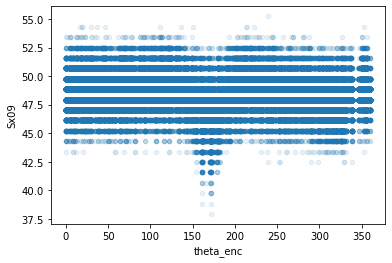

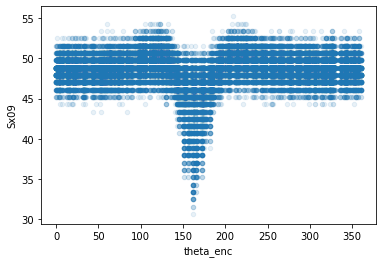

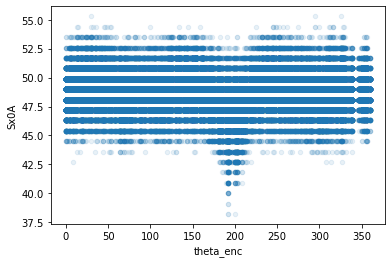

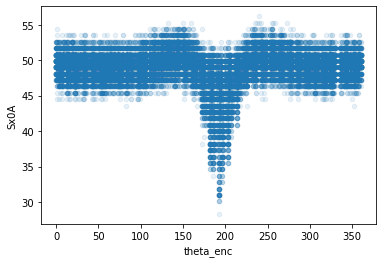

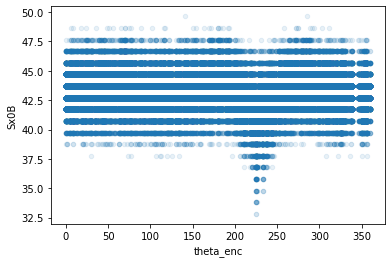

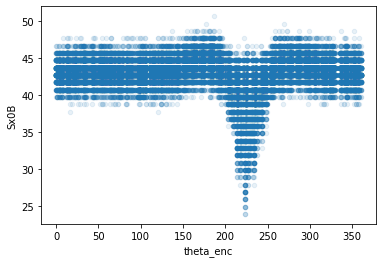

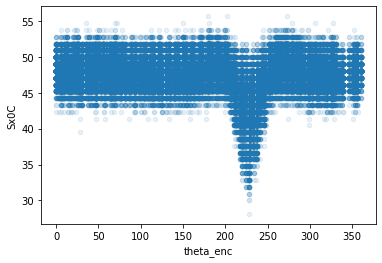

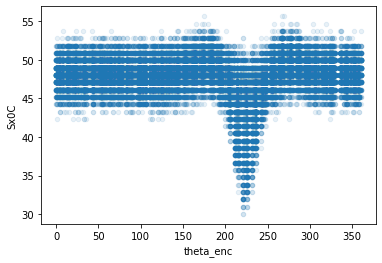

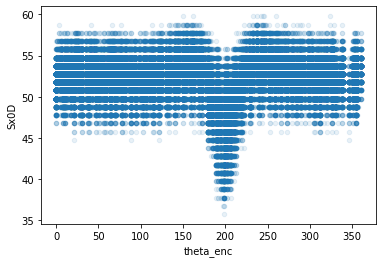

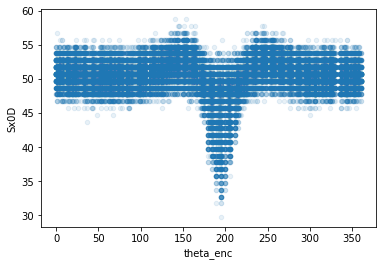

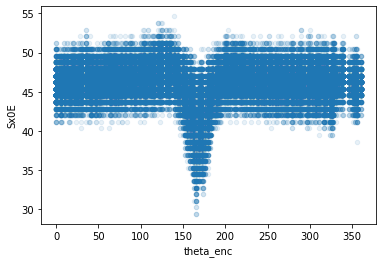

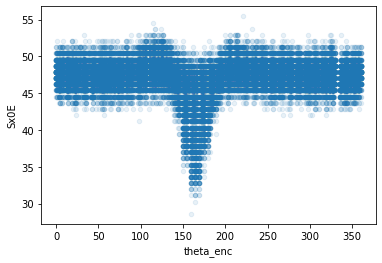

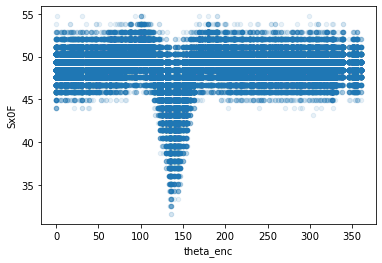

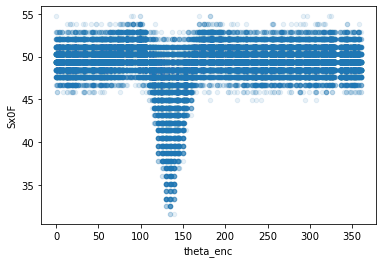

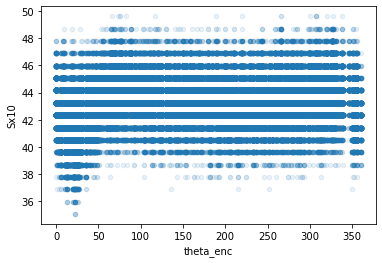

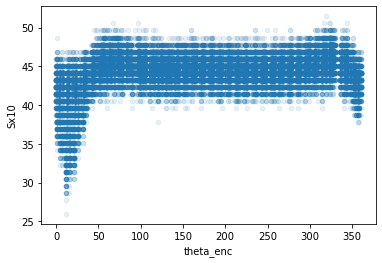

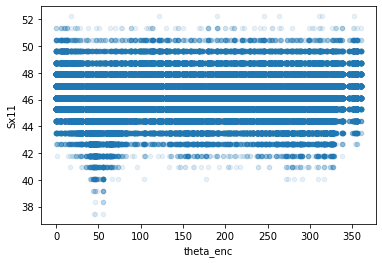

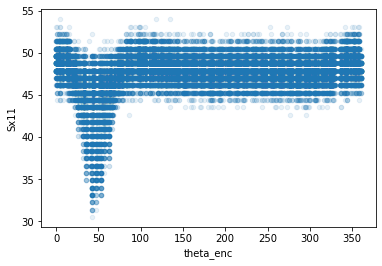

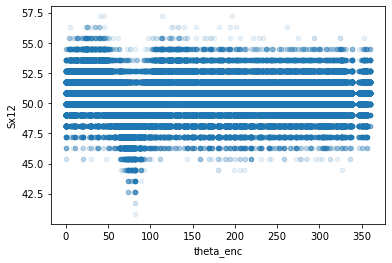

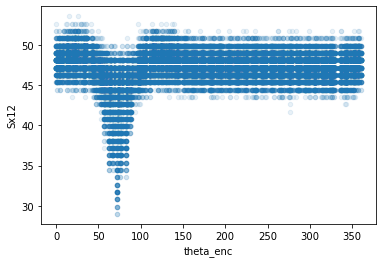

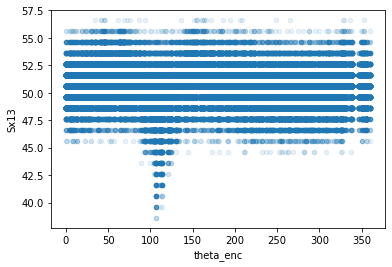

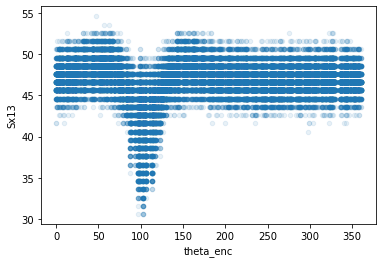

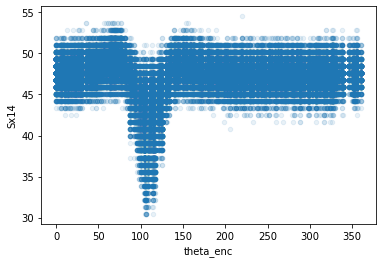

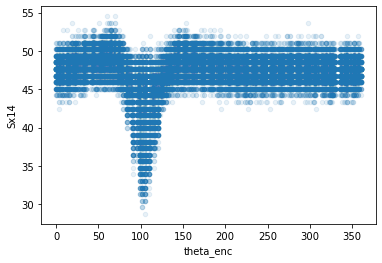

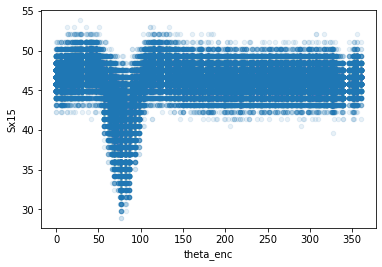

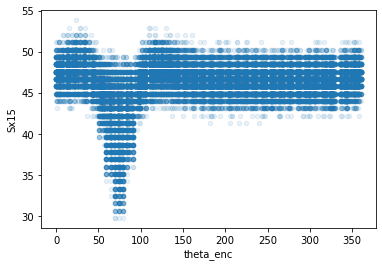

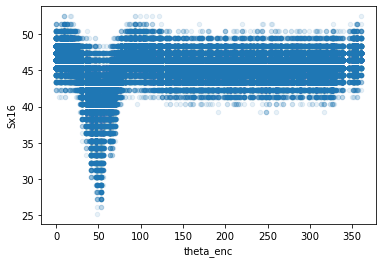

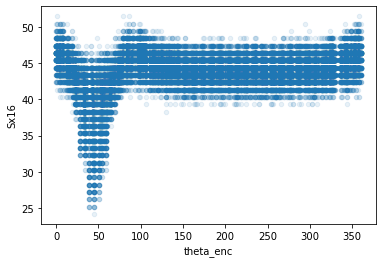

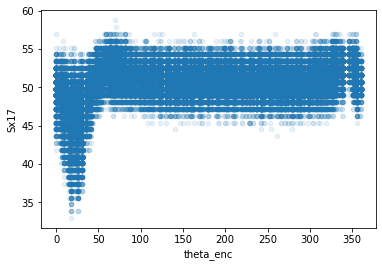

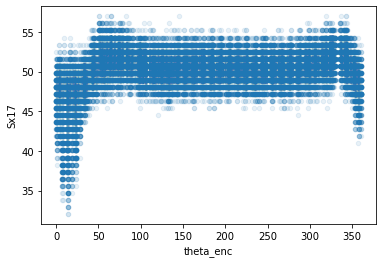

In [137]:
for i in range(0,24):
    SD.plot(kind="scatter", x= "theta_enc",y= "Sx"+format(i,'02X'),alpha = 0.1)
    prevSD.plot(kind="scatter", x= "theta_enc",y= "Sx"+format(i,'02X'),alpha = 0.1)

In [176]:
X = SD.iloc[:,:24]
y = SD.iloc[:,[27,28,29]]

In [177]:
X

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx0E,Sx0F,Sx10,Sx11,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17
0,63.11,47.45,45.94,47.06,54.39,51.27,28.30,50.06,50.65,47.04,...,43.70,47.60,42.34,43.53,48.10,47.6,45.92,43.13,45.39,50.73
1,63.11,43.65,43.27,47.95,51.57,48.39,29.25,46.46,48.83,47.04,...,46.22,46.71,40.52,44.40,48.10,49.6,45.06,44.02,44.38,49.84
2,64.27,44.41,44.16,46.17,53.45,47.43,27.35,47.36,48.83,44.31,...,45.38,46.71,42.34,46.14,53.56,50.6,45.92,45.80,45.39,51.62
3,64.27,45.17,42.38,47.95,50.63,46.47,27.35,46.46,47.01,45.22,...,43.70,48.49,43.25,47.01,49.01,49.6,47.64,44.91,46.40,53.40
4,63.11,45.17,44.16,46.17,52.51,48.39,29.25,46.46,48.83,47.95,...,45.38,45.82,42.34,45.27,49.01,50.6,45.92,44.91,43.37,51.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217695,64.27,47.45,38.82,46.17,50.63,37.83,24.50,49.16,50.65,47.95,...,42.02,47.60,45.98,48.75,49.01,48.6,49.36,45.80,46.40,53.40
217696,63.11,45.93,39.71,44.39,50.63,41.67,25.45,50.96,47.01,44.31,...,43.70,50.27,45.07,47.88,50.83,52.6,47.64,46.69,46.40,50.73
217697,63.11,46.69,38.82,43.50,51.57,42.63,25.45,50.06,48.83,47.04,...,42.86,47.60,46.89,45.27,49.01,50.6,45.06,46.69,46.40,53.40
217698,61.95,46.69,37.93,46.17,49.69,42.63,25.45,50.96,54.29,47.95,...,44.54,48.49,45.07,46.14,49.01,51.6,48.50,46.69,46.40,52.51


In [178]:
y.sample(5)

,z,cos,sin
17978,-0.846154,0.545371,0.838195
15365,-1.000000,0.996041,-0.088894
35426,-0.692308,0.036818,0.999322
110973,0.076923,0.772955,0.634461
80383,-0.230769,0.542735,0.839904


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.01, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2, random_state=42)

In [180]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  172418 ea 79 %    X_valid:  43105 ea 19 %    X_test:  2177 ea 1 %


In [181]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [182]:
import pickle
from joblib import dump, load

file_name = 'myScaler/210913_70ms_Mean3_SS.pkl'
dump(scaler, file_name)

['myScaler/210913_70ms_Mean3_SS.pkl']

In [189]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(16, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(16, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(8, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(3))
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


In [190]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               6400      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                

## Callback (best, early stopping, tensorboard)

In [191]:
import os 
root_logdir = os.path.join(os.curdir, "mylog/210913_70ms_3ea")

def get_run_logdir():
    import time
    run_id= time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [201]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=300,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/300
5389/5389 [==============================] - 6s 1ms/step - loss: 0.1531 - val_loss: 0.1617
Epoch 2/300
5389/5389 [==============================] - 5s 987us/step - loss: 0.1529 - val_loss: 0.1613
Epoch 3/300
3306/5389 [=================>............] - ETA: 1s - loss: 0.1526

KeyboardInterrupt: 

In [186]:
%load_ext tensorboard
%tensorboard --logdir=./mylog/210913_70ms_3ea --port=0914

In [193]:
model.save("D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/myModel/210913_70ms_3ea.h5")

In [194]:
model = tf.keras.models.load_model('myModel/210913_70ms_3ea.h5')
scaler = load('myScaler/210913_70ms_Mean3_SS.pkl')
valid_predictions = model.predict(X_valid)

In [195]:
X_valid

array([[-1.30023502, -0.22847315, -0.4545115 , ...,  0.24159296,
         1.80424636,  0.0413027 ],
       [ 0.42969487,  1.2468605 , -1.03411998, ...,  0.24159296,
         0.49357969,  0.43691012],
       [ 0.42969487, -0.22847315,  0.70470545, ..., -1.3606139 ,
        -1.25397586,  0.83251754],
       ...,
       [-0.14694842, -1.21202892,  0.12509698, ..., -0.15895875,
         0.0566908 ,  0.0413027 ],
       [-0.72359172, -0.72025104, -1.03411998, ...,  0.24159296,
        -0.81708697,  0.43691012],
       [ 0.42969487, -0.22847315,  0.12509698, ..., -2.16171732,
         0.93046858,  0.0413027 ]])

In [196]:
valid_predictions

array([[-0.60922897,  0.68530786, -0.5822393 ],
       [ 0.13020205, -0.6732205 , -0.7732059 ],
       [-0.7778394 ,  0.1950722 ,  0.72194946],
       ...,
       [-0.21154475, -0.83269906, -0.447554  ],
       [-0.48735893, -0.43007278, -0.31395853],
       [ 0.2979053 ,  0.31499526,  0.8900007 ]], dtype=float32)

In [197]:
valid_predictions_df=pd.DataFrame(valid_predictions)

In [198]:
valid_predictions_df.columns = ["valid_z","valid_cos","valid_sin"]
#x2=valid_predictions_df["valid_cos"]
#x1=valid_predictions_df["valid_sin"]
#valid_predictions_df["valid_theta"] = np.arctan2(x1, x2)
#valid_predictions_df

In [199]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["z","cos","sin"]
k_df

,z,cos,sin
0,-0.846154,0.768619,-0.639707
1,0.384615,-0.657770,-0.753219
2,-0.846154,0.353475,0.935444
3,0.692308,-0.916363,-0.400349
4,0.230769,-0.884092,0.467313
...,...,...,...
43100,-1.000000,0.569566,-0.821945
43101,0.230769,0.195090,-0.980785
43102,-0.384615,-0.845635,-0.533762
43103,-0.692308,0.537005,-0.843579


In [200]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
for i in range(0,3):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr

corr
82.47% z
78.45% cos
81.29% sin


,z,cos,sin,valid_z,valid_cos,valid_sin
z,1.000000,-0.016067,-0.011123,0.824687,0.005827,-0.003792
cos,-0.016067,1.000000,0.013435,0.012968,0.784547,0.007540
sin,-0.011123,0.013435,1.000000,-0.004427,0.004176,0.812885
valid_z,0.824687,0.012968,-0.004427,1.000000,0.006974,-0.008471
valid_cos,0.005827,0.784547,0.004176,0.006974,1.000000,0.014773
valid_sin,-0.003792,0.007540,0.812885,-0.008471,0.014773,1.000000


In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(ValidPre,figsize=(40,40))
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/savefig/210913_70ms_3ea_scatter.png')

In [ ]:
ValidPre.plot(kind="scatter", x= "z",y= "valid_z",alpha = 0.1)
ValidPre.plot(kind="scatter", x= "cos",y= "valid_cos",alpha = 0.1)
ValidPre.plot(kind="scatter", x= "sin",y= "valid_sin",alpha = 0.1)
#plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/savefig/210903_70ms_3ea_sin.png')